<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/netflix/rinda/Task_Zeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
df = pd.read_csv("Data Latihan/netflix_titles.csv")

In [3]:
url = 'https://raw.githubusercontent.com/rindanh/Latihan-NDSC/main/netflix/netflix_titles.csv'
df = pd.read_csv(url)

### 1. NaN Diisi unknown

In [4]:
df = df.fillna("UNKNOWN")

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,UNKNOWN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,UNKNOWN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,UNKNOWN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,UNKNOWN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,UNKNOWN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,UNKNOWN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,UNKNOWN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,2016,UNKNOWN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,UNKNOWN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,UNKNOWN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### 2. Type dipisahin antara Movie sama TV Show (Jadi bakal ada 2)

In [5]:
df_movie = df[df['type'] == "Movie"]
df_tv = df[df['type'] == "TV Show"]

### 3. Movie sama TV Show di-group lagi berdasarkan listed_in nya

In [6]:
Counter(df_movie['listed_in']).most_common(1000)

[('Documentaries', 299),
 ('Stand-Up Comedy', 273),
 ('Dramas, International Movies', 248),
 ('Dramas, Independent Movies, International Movies', 186),
 ('Comedies, Dramas, International Movies', 174),
 ('Documentaries, International Movies', 150),
 ('Children & Family Movies, Comedies', 129),
 ('Children & Family Movies', 120),
 ('Comedies, International Movies', 120),
 ('Dramas, International Movies, Romantic Movies', 108),
 ('Action & Adventure, Dramas, International Movies', 103),
 ('Comedies, International Movies, Romantic Movies', 97),
 ('Dramas, International Movies, Thrillers', 93),
 ('Dramas', 89),
 ('Comedies, Dramas, Independent Movies', 77),
 ('Action & Adventure, International Movies', 75),
 ('Comedies', 73),
 ('Dramas, Independent Movies', 68),
 ('Action & Adventure', 68),
 ('Action & Adventure, Comedies, International Movies', 57),
 ('Documentaries, Music & Musicals', 57),
 ('Movies', 56),
 ('Dramas, Thrillers', 55),
 ('Documentaries, Sports Movies', 50),
 ('Action & Adv

In [7]:
np.sort(list(set(df_movie['listed_in'])))

array(['Action & Adventure',
       'Action & Adventure, Anime Features, Children & Family Movies',
       'Action & Adventure, Anime Features, Classic Movies',
       'Action & Adventure, Anime Features, Horror Movies',
       'Action & Adventure, Anime Features, International Movies',
       'Action & Adventure, Anime Features, Sci-Fi & Fantasy',
       'Action & Adventure, Children & Family Movies',
       'Action & Adventure, Children & Family Movies, Classic Movies',
       'Action & Adventure, Children & Family Movies, Comedies',
       'Action & Adventure, Children & Family Movies, Dramas',
       'Action & Adventure, Children & Family Movies, Independent Movies',
       'Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy',
       'Action & Adventure, Classic Movies',
       'Action & Adventure, Classic Movies, Comedies',
       'Action & Adventure, Classic Movies, Cult Movies',
       'Action & Adventure, Classic Movies, Dramas',
       'Action & Adventure, Classic 

In [8]:
df_movie[df_movie['listed_in'].str.contains('Sci-Fi & Fantasy')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
59,80201906,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,PG-13,135 min,"Action & Adventure, Sci-Fi & Fantasy","T'Challa, the superpowered new leader of the h..."
90,81004470,Movie,Animal World,Han Yan,"Li Yi Feng, Zhou Dongyu, Michael Douglas, Bing...",China,"September 28, 2018",2018,TV-MA,130 min,"Action & Adventure, International Movies, Sci-...","An unlucky, debt-ridden teen resorts to his ma..."
102,80231903,Movie,In the Shadow of the Moon,Jim Mickle,"Boyd Holbrook, Michael C. Hall, Cleopatra Cole...",United States,"September 27, 2019",2019,TV-MA,116 min,"Dramas, Sci-Fi & Fantasy, Thrillers",A Philadelphia detective slowly unravels as he...
...,...,...,...,...,...,...,...,...,...,...,...,...
5396,70114022,Movie,Cirque du Freak: The Vampire's Assistant,Paul Weitz,"John C. Reilly, Ken Watanabe, Josh Hutcherson,...",United States,"April 16, 2018",2009,PG-13,109 min,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",When Darren Shan is taken to a circus that's c...
5406,81086641,Movie,Rainbow Jelly,Soukarya Ghosal,"Mahabrata Basu, Anumegha Banerjee, Koushik Sen...",India,"April 15, 2019",2018,TV-14,119 min,"Dramas, International Movies, Sci-Fi & Fantasy","Mistreated by his cruel uncle, an imaginative ..."
5410,80189853,Movie,Beyond Skyline,Liam O'Donnell,"Frank Grillo, Bojana Novakovic, Jonny Weston, ...","United Kingdom, China, Canada, Indonesia, Sing...","April 15, 2018",2017,R,107 min,"Action & Adventure, Sci-Fi & Fantasy","In the wake of an extraterrestrial invasion, a..."
5480,80141156,Movie,Love O2O,Tianyu Zhao,"Jing Boran, Angelababy, Yu Bai, Li Qin, Li Xia...",China,"April 1, 2019",2016,TV-14,103 min,"International Movies, Romantic Movies, Sci-Fi ...",A college stud tries to level up his relations...


In [9]:
df_movie_listed_str = ', '.join(df_movie['listed_in'])
df_movie_listed_list = df_movie_listed_str.split(', ')

#### Make Barplot

In [ ]:
# Data
listed_in_freq = pd.DataFrame([[i, j] for i, j in Counter(df_movie_listed_list).most_common(100)])

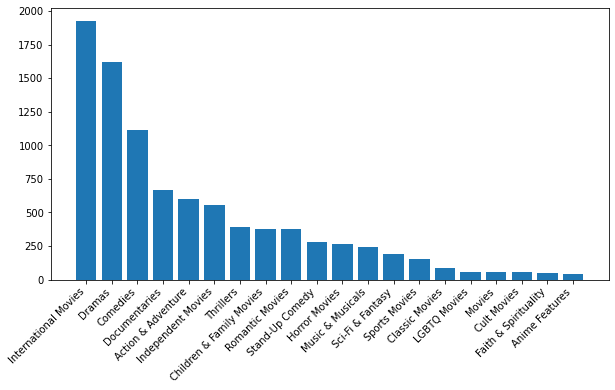

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(np.arange(len(listed_in_freq)), height=listed_in_freq[1])
ax.set_xticks(np.arange(len(listed_in_freq)))
ax.set_xticklabels(listed_in_freq[0], rotation=45, ha="right")
    
plt.show()

In [ ]:
listed_in_freq

,0,1
0,International Movies,1927
1,Dramas,1623
2,Comedies,1113
3,Documentaries,668
4,Action & Adventure,597
5,Independent Movies,552
6,Thrillers,392
7,Children & Family Movies,378
8,Romantic Movies,376
9,Stand-Up Comedy,281


### 4. Setelah itu dibagi lagi berdasarkan ratingnya

### 5. Negara mana yang paling banyak menghasilkan Movie sama TV Show?

#### Make Barplot

In [ ]:
## US, UK dibuat sama dengan UK, US
df_movie_countrygroup = [', '.join(np.sort(i.split(', ')).tolist()) for i in df_movie['country']]

In [ ]:
## Colab Data
country_colab1 = pd.DataFrame([[i, j] for i, j in Counter(df_movie_countrygroup).most_common(1000) if i.count(',') == 0])
country_colab1 = country_colab1.drop(index=2).reset_index(drop=True) # Delete UNKNOWN
country_colab2 = pd.DataFrame([[i, j] for i, j in Counter(df_movie_countrygroup).most_common(1000) if i.count(',') == 1])
country_colab3 = pd.DataFrame([[i, j] for i, j in Counter(df_movie_countrygroup).most_common(1000) if i.count(',') > 1])

In [ ]:
## Ganti United States -> US, United Kingdom -> UK
country_colab1[0] = country_colab1[0].str.replace('United States','US')
country_colab1[0] = country_colab1[0].str.replace('United Kingdom','UK')

country_colab2[0] = country_colab2[0].str.replace('United States','US')
country_colab2[0] = country_colab2[0].str.replace('United Kingdom','UK')

country_colab3[0] = country_colab3[0].str.replace('United States','US')
country_colab3[0] = country_colab3[0].str.replace('United Kingdom','UK')

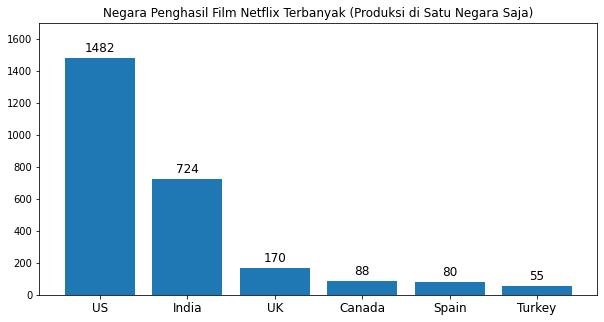

In [ ]:
## One County
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(np.arange(6), height=country_colab1[1].loc[:5])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(country_colab1[0].loc[:5], fontsize=12, rotation=0, ha="center")
ax.set_ylim(0, 1700)
ax.set_title("Negara Penghasil Film Netflix Terbanyak (Produksi di Satu Negara Saja)")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 20, '{}'.format(int(height)), 
            ha='center', 
            va='bottom',
            fontsize=12)

plt.show()

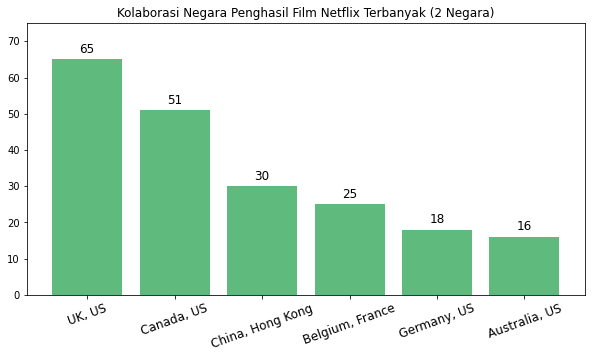

In [ ]:
## Colab 2 Country
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(np.arange(6), height=country_colab2[1].loc[:5], color='#5fba7d')
ax.set_xticks(np.arange(6))
ax.set_xticklabels(country_colab2[0].loc[:5], fontsize=12, rotation=20, ha="center")
ax.set_ylim(0, 75)
ax.set_title("Kolaborasi Negara Penghasil Film Netflix Terbanyak (2 Negara)")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 1, '{}'.format(int(height)), 
            ha='center', 
            va='bottom',
            fontsize=12)

plt.show()

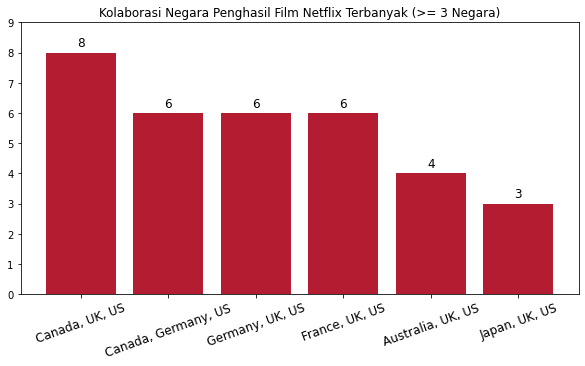

In [ ]:
## Colab 3 Country
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(np.arange(6), height=country_colab3[1].loc[:5], color='#b31c31')
ax.set_xticks(np.arange(6))
ax.set_xticklabels(country_colab3[0].loc[:5], fontsize=12, rotation=20, ha="center")
ax.set_ylim(0, 9)
ax.set_title("Kolaborasi Negara Penghasil Film Netflix Terbanyak (>= 3 Negara)")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 0.1, '{}'.format(int(height)), 
            ha='center', 
            va='bottom',
            fontsize=12)

plt.show()

### 6. Jumlah yang ditambahkan ke Netflix dari setiap negara setiap tahunnya

In [ ]:
## Cek negara yg paling banyak muncul
df_movie_countrylist = ', '.join(df_movie['country']).split(', ')
frequent_countries = Counter(df_movie_countrylist).most_common(100)

In [ ]:
df_movie_dateadded = df_movie[df_movie['date_added'] != "UNKNOWN"]
df_tv_dateadded = df_tv[df_tv['date_added'] != "UNKNOWN"]

In [ ]:
df_movie_dateformat = pd.to_datetime(df_movie_dateadded['date_added'], format="%B %d, %Y")
df_movie_dateadded['date_added_year'] = [i.year for i in df_movie_dateformat]

# dateadded = pd.to_datetime(tv_dateadded['date_added'], format="%B %d, %Y")
# tv_dateadded['date_added_year'] = [i.year for i in dateadded]

C:\Miniconda\envs\datasci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
year_per_country = []
y = []
date_added_years = np.sort(list(set(df_movie_dateadded['date_added_year'])))
countries = [i for i, j in frequent_countries]

for year in date_added_years[::-1]: # Dibalik tahunnya dari 2008 dulu
    for country in countries:
        query = df_movie_dateadded[(df_movie_dateadded['date_added_year'] == year)
                                   & (df_movie_dateadded['country'].str.contains(country))]
        y.append(len(query))
    year_per_country.append(y)
    y = []
        
    
# df_movie_dateadded[df_movie_dateadded['']]

In [ ]:
df_year_per_country = pd.DataFrame(year_per_country, index=date_added_years[::-1], columns=countries)
df_year_per_country = df_year_per_country.drop(columns='UNKNOWN')
df_year_per_country = df_year_per_country.iloc[:, :10]
df_year_per_country = df_year_per_country.T

In [ ]:
df_year_per_country

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
United States,117,744,465,373,142,41,18,5,4,12,1,1,1
India,8,229,343,188,15,0,0,0,0,0,0,0,0
United Kingdom,24,131,103,83,32,3,3,0,0,0,0,0,0
Canada,10,65,60,55,17,2,1,1,0,0,0,0,0
France,7,68,52,50,17,6,0,0,0,1,0,0,0
Spain,3,39,38,38,14,0,0,0,0,1,0,0,0
Germany,14,45,28,31,10,1,0,0,0,0,0,0,0
Hong Kong,1,24,56,8,4,0,0,0,0,0,0,0,0
China,0,28,33,18,5,0,0,0,0,0,0,0,0
Mexico,5,20,22,25,9,1,0,0,1,1,0,0,0


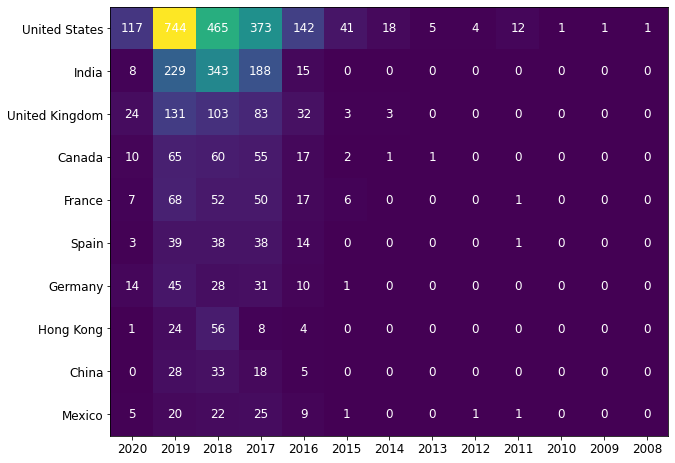

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
im = ax.imshow(df_year_per_country)

ax.set_xticks(np.arange(len(df_year_per_country.columns)))
ax.set_yticks(np.arange(len(df_year_per_country.index)))

ax.set_xticklabels(df_year_per_country.columns, fontsize=12)
ax.set_yticklabels(df_year_per_country.index, fontsize=12)

# Loop over data dimensions and create text annotations.
for i in range(len(df_year_per_country.index)):
    for j in range(len(df_year_per_country.columns)):
        text = ax.text(j, i, df_year_per_country.iloc[i, j], 
                       ha="center", va="center", color="w", fontsize=12)
        
# ax.text(0, 1, 3)    

plt.show()

In [ ]:
us_movie = df_movie_dateadded[df_movie_dateadded['country'].str.contains('United States')]
india_movie = df_movie_dateadded[df_movie_dateadded['country'].str.contains('India')]
uk_movie = df_movie_dateadded[df_movie_dateadded['country'].str.contains('United Kingdom')]
canada_movie = df_movie_dateadded[df_movie_dateadded['country'].str.contains('Canada')]
france_movie = df_movie_dateadded[df_movie_dateadded['country'].str.contains('France')]

In [ ]:
us_movie['date_added_year'].value_counts()

2019    744
2018    465
2017    373
2016    142
2020    117
2015     41
2014     18
2011     12
2013      5
2012      4
2010      1
2009      1
2008      1
Name: date_added_year, dtype: int64

In [ ]:
## One County
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(np.arange(6), height=country_colab1[1].loc[:5])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(country_colab1[0].loc[:5], fontsize=12, rotation=0, ha="center")
ax.set_ylim(0, 1700)
ax.set_title("Negara Penghasil Film Netflix Terbanyak (Produksi di Satu Negara Saja)")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 20, '{}'.format(int(height)), 
            ha='center', 
            va='bottom',
            fontsize=12)

plt.show()

### 7. Dari jumlah yang ditambahkan itu, dibuat semacam perbandingan mana yang terbanyak tiap tahun (visualisasinya gue ngide mirip yang di Data is Beautiful di YouTube)

### 8. Director dengan karya terbanyak

In [10]:
df.director.value_counts()

UNKNOWN                           1969
Raúl Campos, Jan Suter              18
Marcus Raboy                        14
Jay Karas                           13
Jay Chapman                         12
                                  ... 
Ahmed Al-Badry                       1
Arun Vaidyanathan                    1
Kief Davidson, Richard Ladkani       1
Peter Farrelly, Bobby Farrelly       1
Jennifer Kaytin Robinson             1
Name: director, Length: 3302, dtype: int64

#### beserta negaranya

In [69]:
df[df['director'] == 'Raúl Campos, Jan Suter']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1337,80183088,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
1655,80192137,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
1794,80192065,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
2035,80183197,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
2133,80192139,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
2134,80192063,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
2504,80191989,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
2550,80097641,Movie,Sofía Niño de Rivera: Exposed,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"June 24, 2016",2016,TV-MA,80 min,Stand-Up Comedy,Self-deprecating comic Sofía Niño de Rivera pu...
2783,80192064,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
2834,80192135,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


In [8]:
len(df['director'].unique())

3302

In [9]:
directors_str = ', '.join(df['director'])
directors = list(set(directors_str.split(', ')))
len(directors)

3656

### 10. rata2 durasi per rating (dibagi antara Movie dan TV Show

#### Movie

In [54]:
df_movie = df[df.type == 'Movie']
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,UNKNOWN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


##### Change duration from string to number
the unit of the duration is per minute

In [55]:
def convert_duration_min(dur_str):
    return int(dur_str[:-4])

In [56]:
df_movie['duration'] = df_movie['duration'].apply(convert_duration_min)
df_movie.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,UNKNOWN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


after the duration is converted to integer, we can see the description below

In [57]:
df_movie.describe()[['duration']]

,duration
count,4265.000000
mean,99.100821
std,28.074857
min,3.000000
25%,86.000000
50%,98.000000
75%,115.000000
max,312.000000


##### Get Average Duration per rating

In [59]:
df_movie_rating_duration['avg_duration'] = df_movie.groupby('rating', as_index=False).mean()[['duration']]
df_movie_rating_duration

,0,avg_duration
0,TV-PG,85.361111
1,TV-MA,131.500000
2,TV-Y7-FV,95.123762
3,TV-Y7,97.786885
4,TV-14,108.853147
5,R,106.158103
6,TV-Y,108.137765
7,NR,67.837500
8,PG-13,95.295252
9,TV-G,97.949074


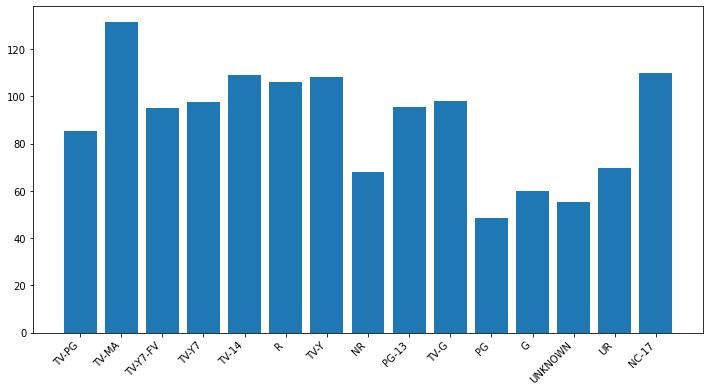

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(np.arange(len(df_movie_rating_duration)), height=df_movie_rating_duration['avg_duration'])
ax.set_xticks(np.arange(len(df_movie_rating_duration)))
ax.set_xticklabels(df_movie_rating_duration[0], rotation=45, ha="right")
    
plt.show()

#### TV Show

In [48]:
df_tvshow = df[df.type == 'TV Show']
df_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,UNKNOWN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,UNKNOWN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,UNKNOWN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,UNKNOWN,UNKNOWN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,UNKNOWN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",UNKNOWN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


##### Change duration from string to number
the unit of the duration is per season

In [49]:
def convert_duration_season(dur_str):
    return int(dur_str[:-7])

In [50]:
df_tvshow['duration'] = df_tvshow['duration'].apply(convert_duration_season)
df_tvshow.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,UNKNOWN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,UNKNOWN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,UNKNOWN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,UNKNOWN,UNKNOWN,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,UNKNOWN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",UNKNOWN,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


after the duration is converted to integer, we can see the description below

In [51]:
df_tvshow.describe()

,show_id,release_year,duration
count,1.969000e+03,1969.000000,1969.000000
mean,7.904892e+07,2015.536313,1.779584
std,3.462549e+06,5.799568,1.624936
min,6.003679e+07,1925.000000,1.000000
25%,8.009178e+07,2015.000000,1.000000
50%,8.017572e+07,2017.000000,1.000000
75%,8.023986e+07,2018.000000,2.000000
max,8.123560e+07,2020.000000,15.000000


1     1321
2      304
3      158
4       61
5       46
6       22
7       21
8       16
9        7
11       3
10       3
15       2
13       2
12       2
14       1
Name: duration, dtype: int64


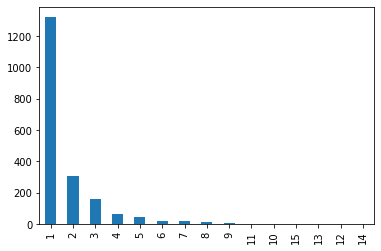

In [52]:
print(df_tvshow.duration.value_counts())
df_tvshow.duration.value_counts().plot(kind="bar")

##### Get Average Duration per rating

In [66]:
df_tvshow_rating_duration = df_tvshow.groupby('rating', as_index=False).mean()[['rating', 'duration']]
df_tvshow_rating_duration

,rating,duration
0,G,1.000000
1,NR,2.875000
2,PG,2.000000
3,R,1.000000
4,TV-14,1.830303
5,TV-G,2.043478
6,TV-MA,1.622975
7,TV-PG,1.784387
8,TV-Y,1.882353
9,TV-Y7,1.920000


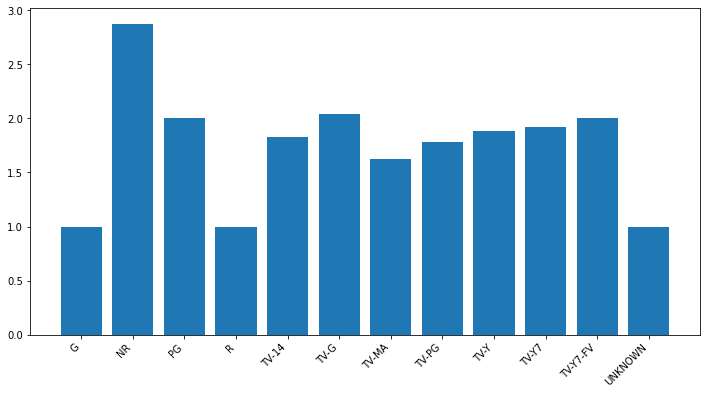

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(np.arange(len(df_tvshow_rating_duration)), height=df_tvshow_rating_duration['duration'])
ax.set_xticks(np.arange(len(df_tvshow_rating_duration)))
ax.set_xticklabels(df_tvshow_rating_duration['rating'], rotation=45, ha="right")
    
plt.show()